In [1]:
import numpy as np
import pandas as pd
import matplotlib as mplot
import seaborn as sns
hfp = pd.read_csv("heart_failure_clinical_records_dataset.csv", header=0)
print(hfp)
print(hfp.shape)
print(hfp.head(3))
print(hfp.DEATH_EVENT.value_counts())

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [2]:
disease = len(hfp[hfp['DEATH_EVENT'] == 1])
no_disease = len(hfp[hfp['DEATH_EVENT']== 0])
print(disease)
print(no_disease)

96
203


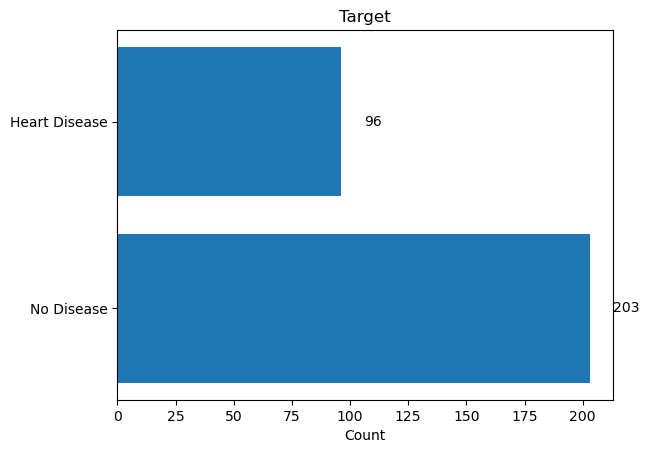

In [3]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
y = ('Heart Disease', 'No Disease')
y_pos = np.arange(len(y))
x = (disease, no_disease)
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Target')
for i, v in enumerate(x):
    ax.text(v + 10, i, str(v), color='black', va='center', fontweight='normal')
plt.show()

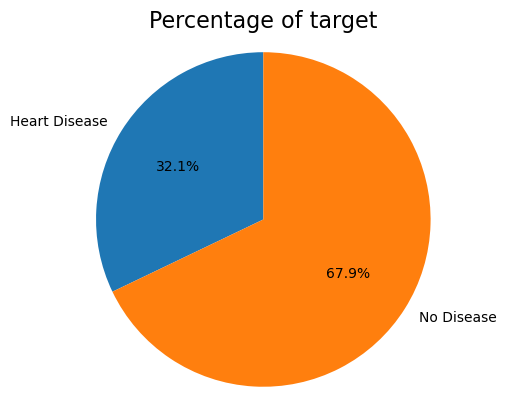

In [4]:
import matplotlib.pyplot as plt
y = ('Heart Disease', 'No Disease')
y_pos = np.arange(len(y))
x = (disease, no_disease)
labels = 'Heart Disease', 'No Disease'
sizes = [disease, no_disease]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=90) 
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of target', size=16)
plt.show() # Pie chart, where the slices will be ordered and plotted counter-clockwise:

In [5]:
hfp.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
categorical = []
progressive = []
for feature in hfp.columns:
    if len(hfp[feature].unique()) <= 8:
        categorical.append(feature)
    else:
        progressive.append(feature)

In [7]:
print(categorical)
print(progressive)

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


C:\Users\s545500\AppData\Local\Temp\ipykernel_15000\590989856.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = hfp.drop('DEATH_EVENT',1)


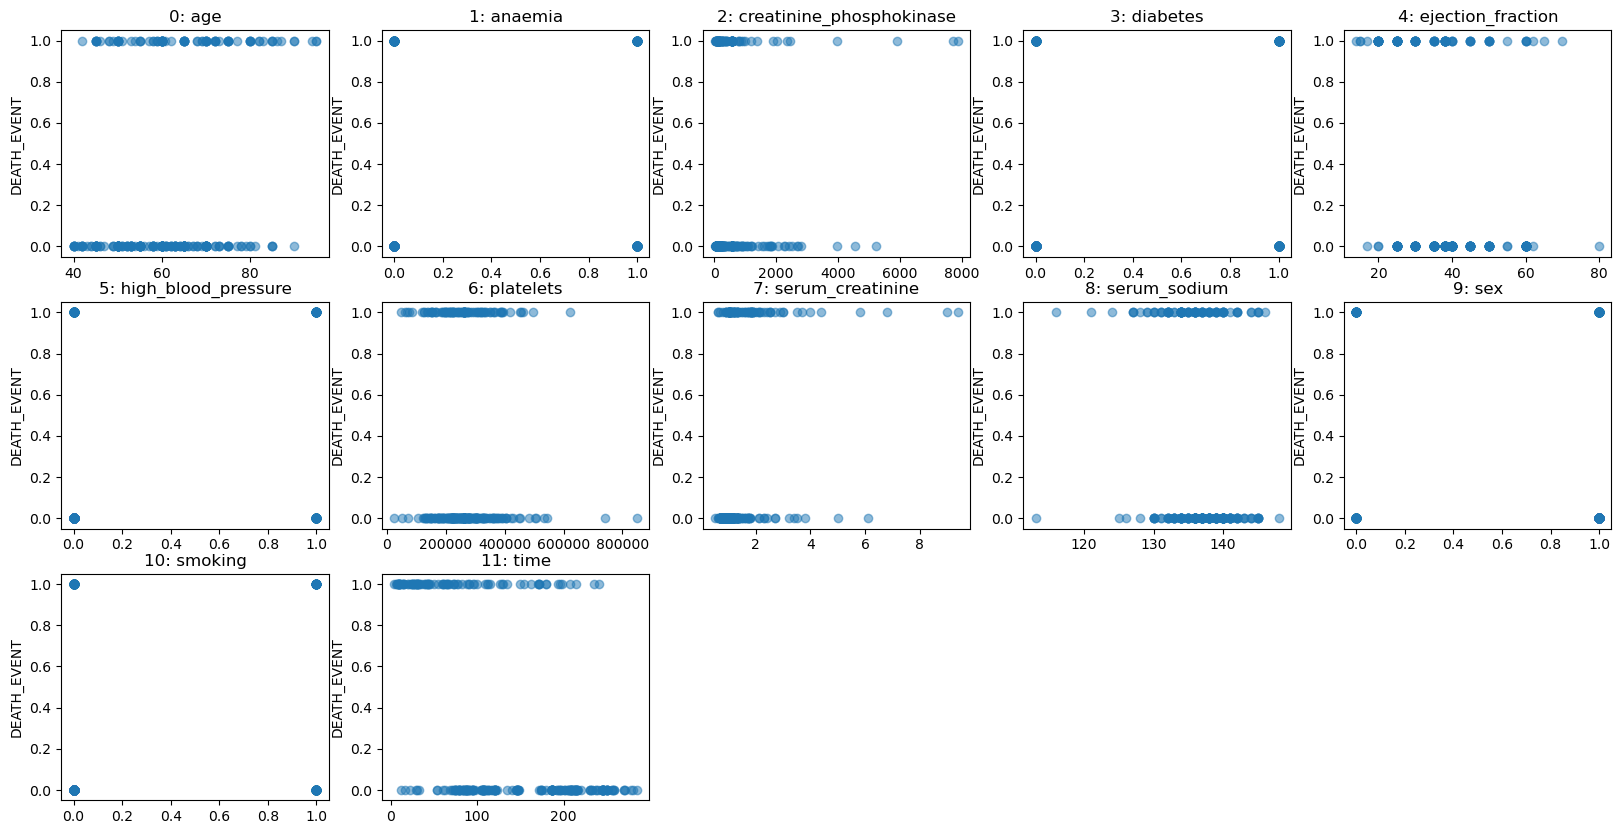

In [8]:
X = hfp.drop('DEATH_EVENT',1)
X=np.array(X)
X
y = hfp['DEATH_EVENT']
y=np.array(y)
y
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 11:
        ax.set_visible(False)
        continue
    ax.plot(X[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, hfp.columns[i]))
    ax.set_ylabel("DEATH_EVENT")

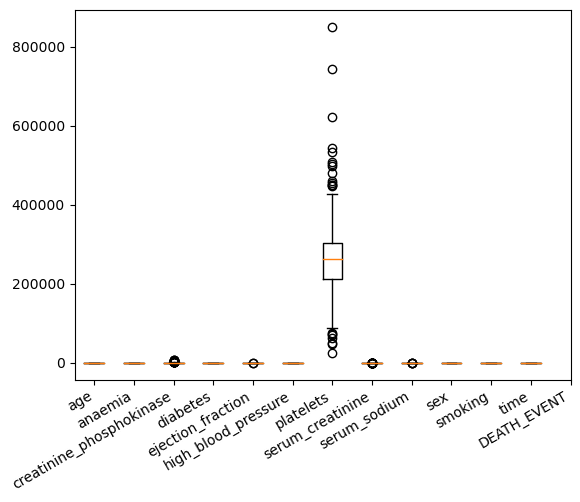

In [9]:
#Box Plot before Scaling
plt.boxplot(X)
plt.xticks(np.arange(1, X.shape[1] + 2),
           hfp.columns, rotation=30, ha="right");

In [10]:
X = hfp.drop('DEATH_EVENT',1)
y = hfp['DEATH_EVENT']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('shape of X and y respectively (train) :', X_train.shape, y_train.shape)
print('shape of X and y respectively (test) :', X_test.shape, y_test.shape)

C:\Users\s545500\AppData\Local\Temp\ipykernel_15000\2427113505.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = hfp.drop('DEATH_EVENT',1)


shape of X and y respectively (train) : (239, 12) (239,)
shape of X and y respectively (test) : (60, 12) (60,)


In [11]:
#Scaling
from sklearn.preprocessing import StandardScaler
# Back to King Country house prices
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

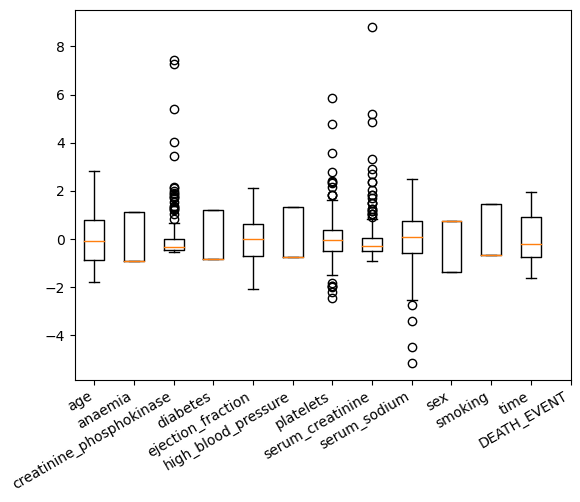

In [12]:
#Box Plot after Scaling
plt.boxplot(X_train_scaled)
plt.xticks(np.arange(1, X.shape[1] + 2),
           hfp.columns, rotation=30, ha="right");

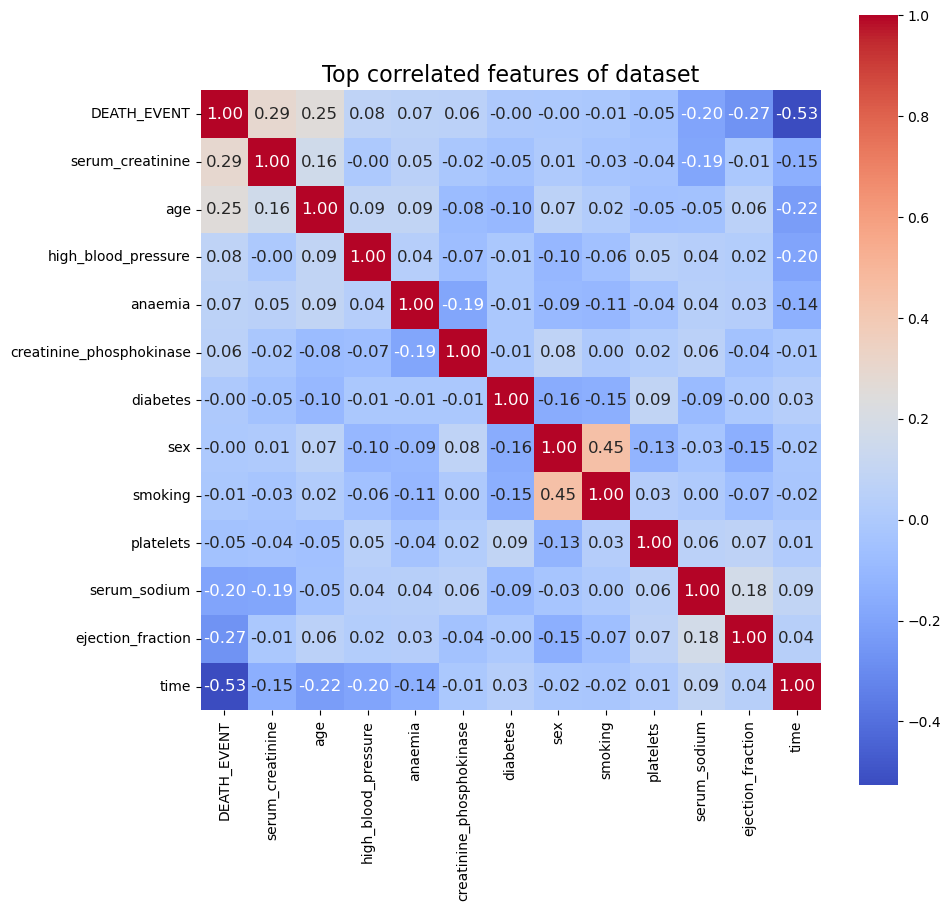

'\ncorrmat = hfp.corr()\nf, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))\nax.set_title("Correlation Matrix", fontsize=12)\nfilter = hfp.columns != \'id\'\nsns.heatmap(hfp[hfp.columns[filter]].corr(), vmin=-1, vmax=1, cmap=\'coolwarm\', annot=True)\n'

In [13]:
# Correlation Matrix
import seaborn as sns
top = 14
corr = hfp.corr()
top14 = corr.nlargest(top, 'DEATH_EVENT')['DEATH_EVENT'].index
corr_top14 = hfp[top14].corr()
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_top14, square=True, ax=ax, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':12})
plt.title('Top correlated features of dataset', size=16)
plt.show()
"""
corrmat = hfp.corr()
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
ax.set_title("Correlation Matrix", fontsize=12)
filter = hfp.columns != 'id'
sns.heatmap(hfp[hfp.columns[filter]].corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
"""

C:\Users\s545500\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


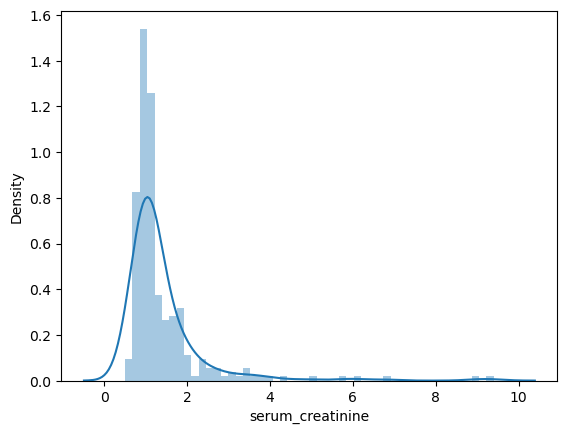

In [14]:
ax = sns.distplot(hfp['serum_creatinine']) # histogram distribution

C:\Users\s545500\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


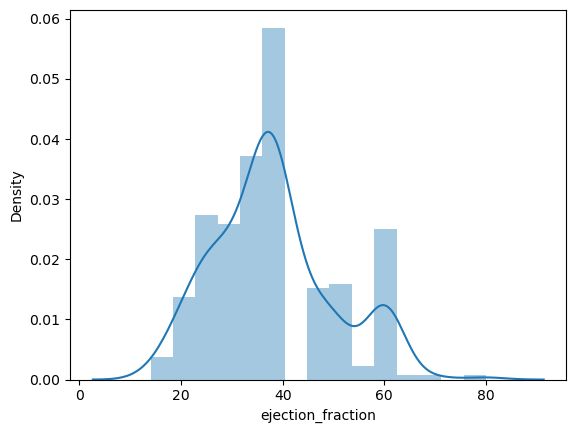

In [15]:
ax = sns.distplot(hfp['ejection_fraction']) # histogram distribution

 **Logistic Regression**

In [16]:
#Before Scaling
print('Logistic Regression before scaling')
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_logreg = score
out_logreg = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

Logistic Regression before scaling
Training Score: 0.8577405857740585
Testing Score: 0.7333333333333333
   Predicted
0          0
1          0
2          1
3          0
4          0
% of people predicted with heart-disease: 0.18333333333333332
              precision    recall  f1-score   support

           0       0.71      0.95      0.81        37
           1       0.82      0.39      0.53        23

    accuracy                           0.73        60
   macro avg       0.77      0.67      0.67        60
weighted avg       0.75      0.73      0.70        60



In [17]:
#After Scaling
print('Logistic Regression')
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
Y_pred = model.predict(X_test_scaled)
score = model.score(X_train_scaled, y_train)
print('Training Score:', score)
score = model.score(X_test_scaled, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_logreg = score
out_logreg = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

Logistic Regression
Training Score: 0.8661087866108786
Testing Score: 0.7833333333333333
   Predicted
0          0
1          0
2          1
3          0
4          0
% of people predicted with heart-disease: 0.2
              precision    recall  f1-score   support

           0       0.75      0.97      0.85        37
           1       0.92      0.48      0.63        23

    accuracy                           0.78        60
   macro avg       0.83      0.73      0.74        60
weighted avg       0.81      0.78      0.76        60



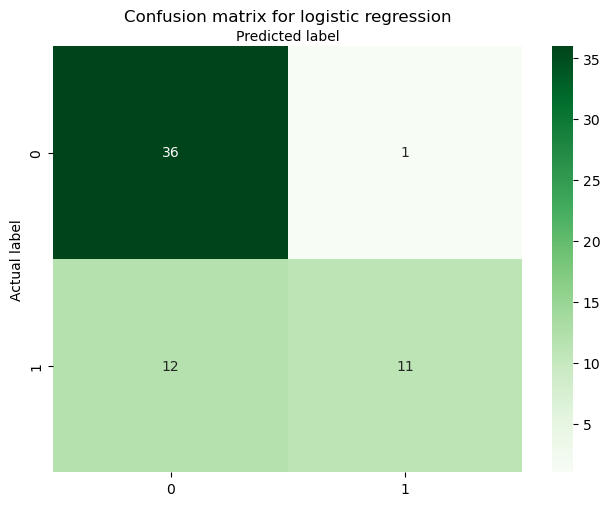

In [18]:
#Confusion Matrix for Logsitic Regression
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for logistic regression')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

**Random Forest Regression**

In [19]:
#Before Scaling
print('RandomForestClassifier before Scaling')
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100) # , max_depth=5, random_state=1
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_rfc = score
out_rfc = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

RandomForestClassifier before Scaling
Training Score: 1.0
Testing Score: 0.85
   Predicted
0          0
1          0
2          1
3          0
4          0
% of people predicted with heart-disease: 0.26666666666666666
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        37
           1       0.94      0.65      0.77        23

    accuracy                           0.85        60
   macro avg       0.88      0.81      0.83        60
weighted avg       0.86      0.85      0.84        60



In [20]:
#Random Forest after Scaling
print('RandomForestClassifier')
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100) # , max_depth=5, random_state=1
model.fit(X_train_scaled, y_train)
Y_pred = model.predict(X_test_scaled)
score = model.score(X_train_scaled, y_train)
print('Training Score:', score)
score = model.score(X_test_scaled, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_rfc = score
out_rfc = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

RandomForestClassifier
Training Score: 1.0
Testing Score: 0.85
   Predicted
0          0
1          0
2          1
3          0
4          0
% of people predicted with heart-disease: 0.26666666666666666
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        37
           1       0.94      0.65      0.77        23

    accuracy                           0.85        60
   macro avg       0.88      0.81      0.83        60
weighted avg       0.86      0.85      0.84        60



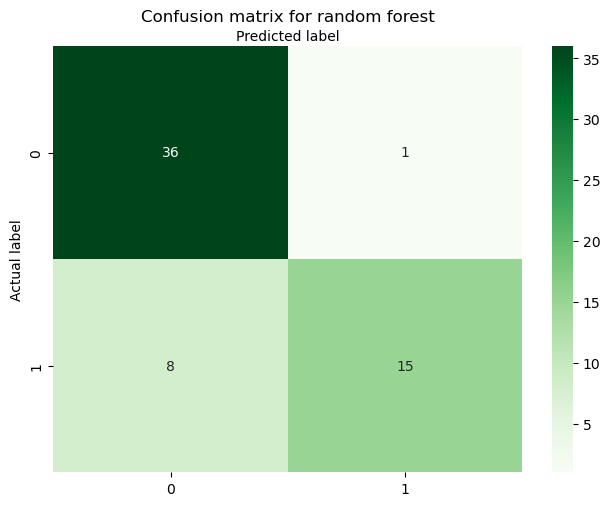

In [21]:
#Confusin Matrix for Random Forest
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for random forest')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

**KNeighborsClassifier**

In [22]:
#Before Scaling
print('KNeighborsClassifier before scaling')
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score_logreg)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_knc = score
out_knc = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

KNeighborsClassifier before scaling
Training Score: 0.7833333333333333
Testing Score: 0.48333333333333334
   Predicted
0          1
1          0
2          0
3          0
4          0
% of people predicted with heart-disease: 0.26666666666666666
              precision    recall  f1-score   support

           0       0.57      0.68      0.62        37
           1       0.25      0.17      0.21        23

    accuracy                           0.48        60
   macro avg       0.41      0.42      0.41        60
weighted avg       0.45      0.48      0.46        60



In [23]:
#KNeighbors Classifier after scaling
print('KNeighborsClassifier')
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)
Y_pred = model.predict(X_test_scaled)
score = model.score(X_train_scaled, y_train)
print('Training Score:', score_logreg)
score = model.score(X_test_scaled, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_knc = score
out_knc = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

KNeighborsClassifier
Training Score: 0.7833333333333333
Testing Score: 0.7166666666666667
   Predicted
0          0
1          0
2          1
3          0
4          0
% of people predicted with heart-disease: 0.16666666666666666
              precision    recall  f1-score   support

           0       0.70      0.95      0.80        37
           1       0.80      0.35      0.48        23

    accuracy                           0.72        60
   macro avg       0.75      0.65      0.64        60
weighted avg       0.74      0.72      0.68        60



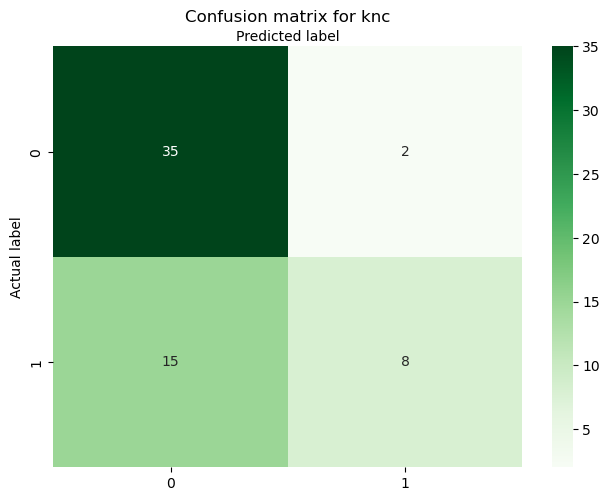

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for knc')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

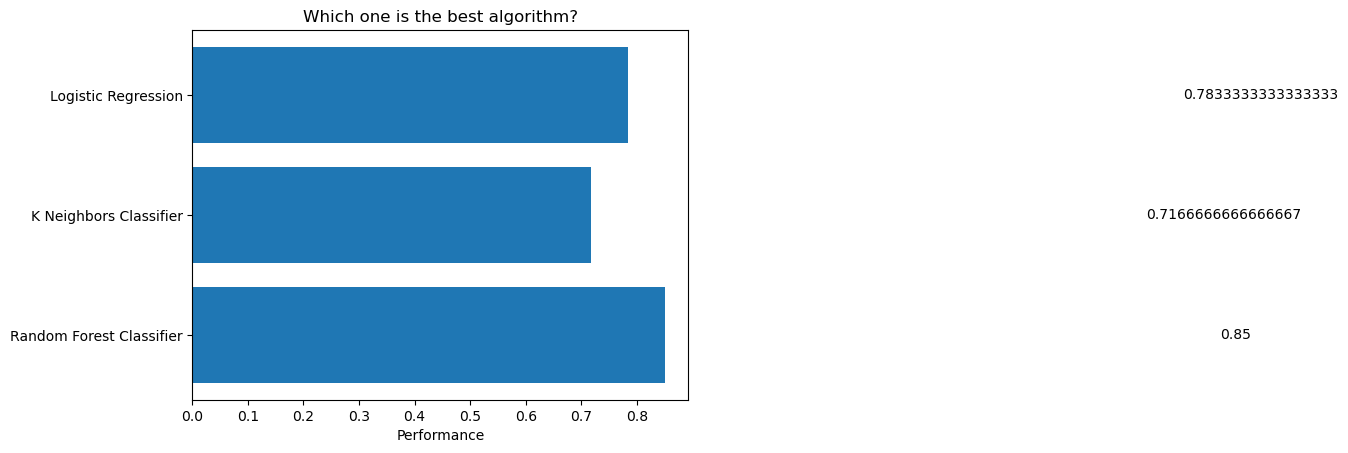

In [25]:
plt.rcdefaults()
fig, ax = plt.subplots()
algorithms = ('Logistic Regression', 'K Neighbors Classifier', 'Random Forest Classifier')
y_pos = np.arange(len(algorithms))
x = (score_logreg, score_knc, score_rfc) # scores
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(algorithms)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Which one is the best algorithm?')
for i, v in enumerate(x):
    ax.text(v + 1, i, str(v), color='black', va='center', fontweight='normal')
plt.show()